In [1]:
import numpy as np
import bms_env
import matplotlib.pyplot as plt
import seaborn as sns

from utils import *
s

In [2]:
bms = bms_env.BMSenv(num_cells= 2, k_tanh_params= [0.8, 2.5], Q_cells = [2.35, 2.35])
print(bms)

BMSenv(num_cells=2,
        k_tanh_params=[0.8 2.5],
        Q_cells=[2.35 2.35],
        MAX_VOLTAGE=4.2,
        MIN_VOLTAGE=2.2,
        INIT_SOC=0.9,
        I_CURRENT=0.22,
        TIMESTEP=0.001,
        w_reward=10.0,
        current_state=[4.19999 4.19999],
        current_soc=[0.86866646 0.89996368])


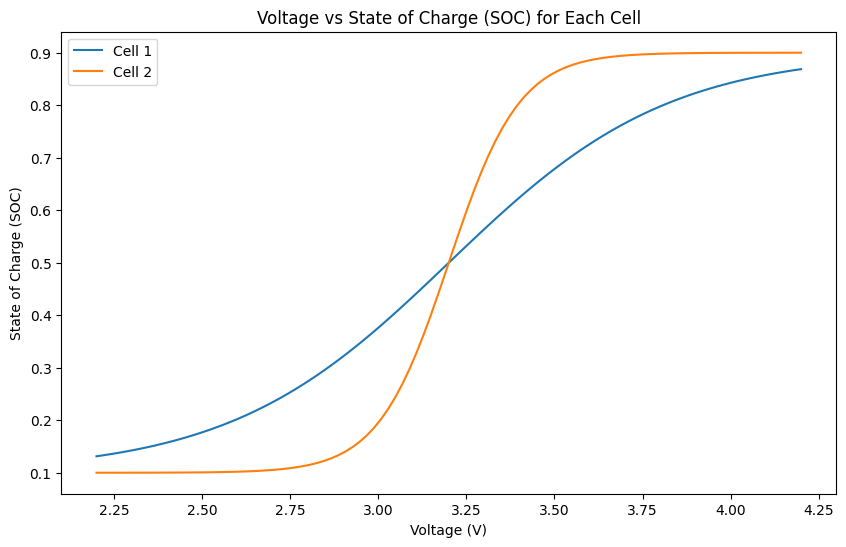

In [3]:
plot_voltage_vs_soc(bms)

In [4]:
T = 10_000

# Always disconected (All the batteries stay still)

In [5]:
bms.reset()
states= [bms.state]
states_soc = [bms.state_soc]
actions = []
rewards = []
dones = [False]

while not dones[-1] and len(states) < T:
    action = 0
    state, reward, done, _ = bms.step(action)
    states.append(state)
    states_soc.append(bms.state_soc)
    actions.append(bms.int_action_to_switch_action(action))
    rewards.append(reward)
    dones.append(done)


print(f"Sum of rewards: {np.sum(rewards)}")

Sum of rewards: -999900


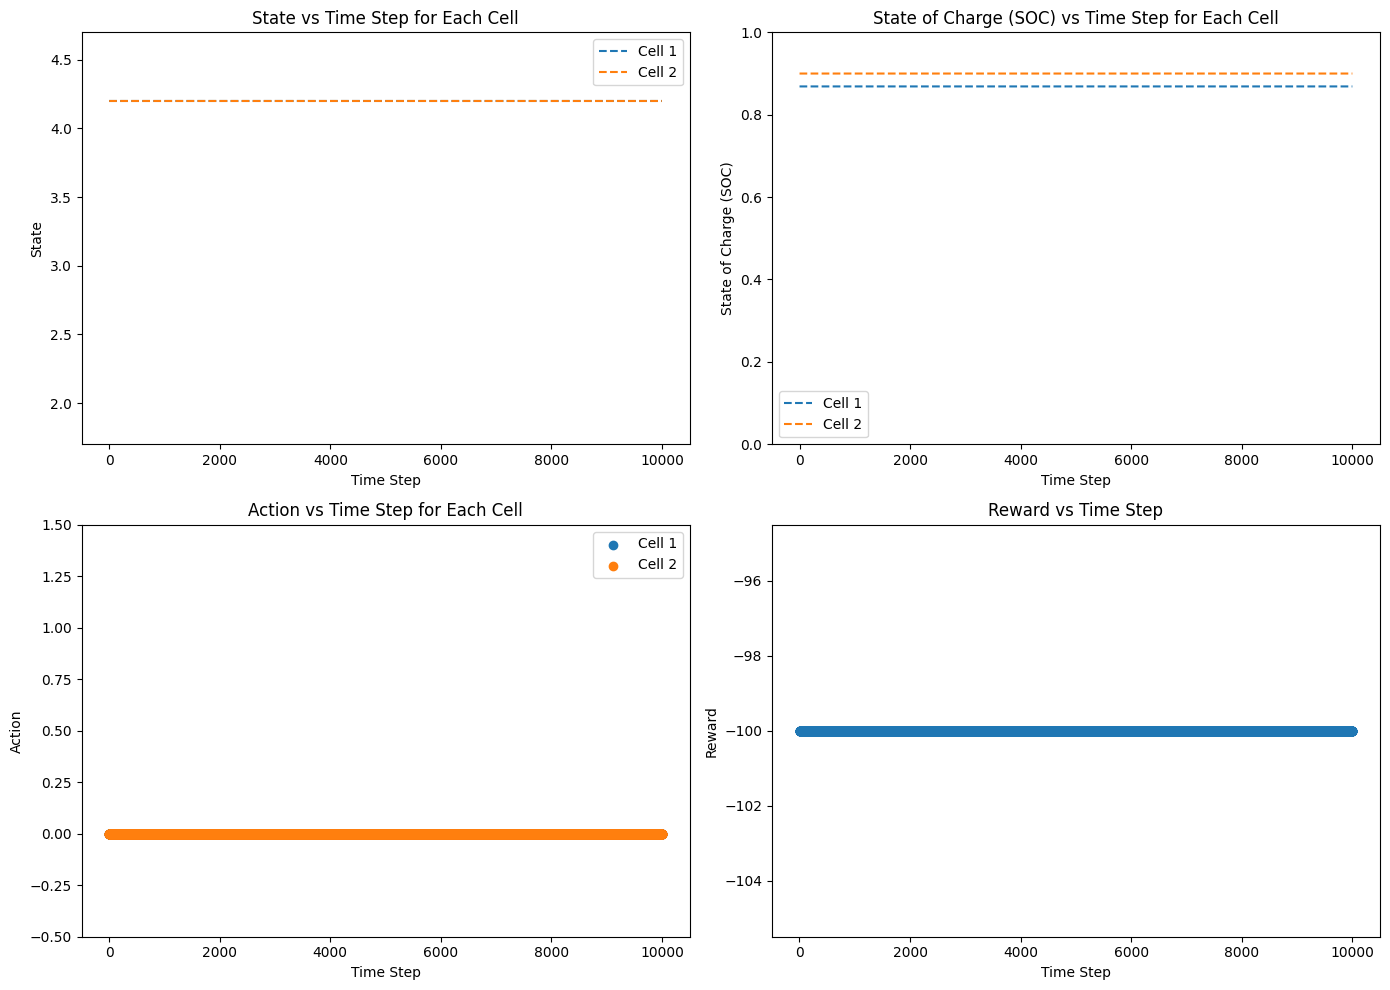

In [6]:
plot_bms_evolution(bms, states, states_soc, actions, rewards, dones)

# Always connected (All the batteries Discharge)

In [7]:
bms.reset()
states= [bms.state]
states_soc = [bms.state_soc]
actions = []
rewards = []
dones = [False]

while not dones[-1] and len(states) < T:
    action = 3
    state, reward, done, _ = bms.step(action)
    states.append(state)
    states_soc.append(bms.state_soc)
    actions.append(bms.int_action_to_switch_action(action))
    rewards.append(reward)
    dones.append(done)

print(f"Sum of rewards: {np.sum(rewards)}")

Sum of rewards: -3.7708601184659574


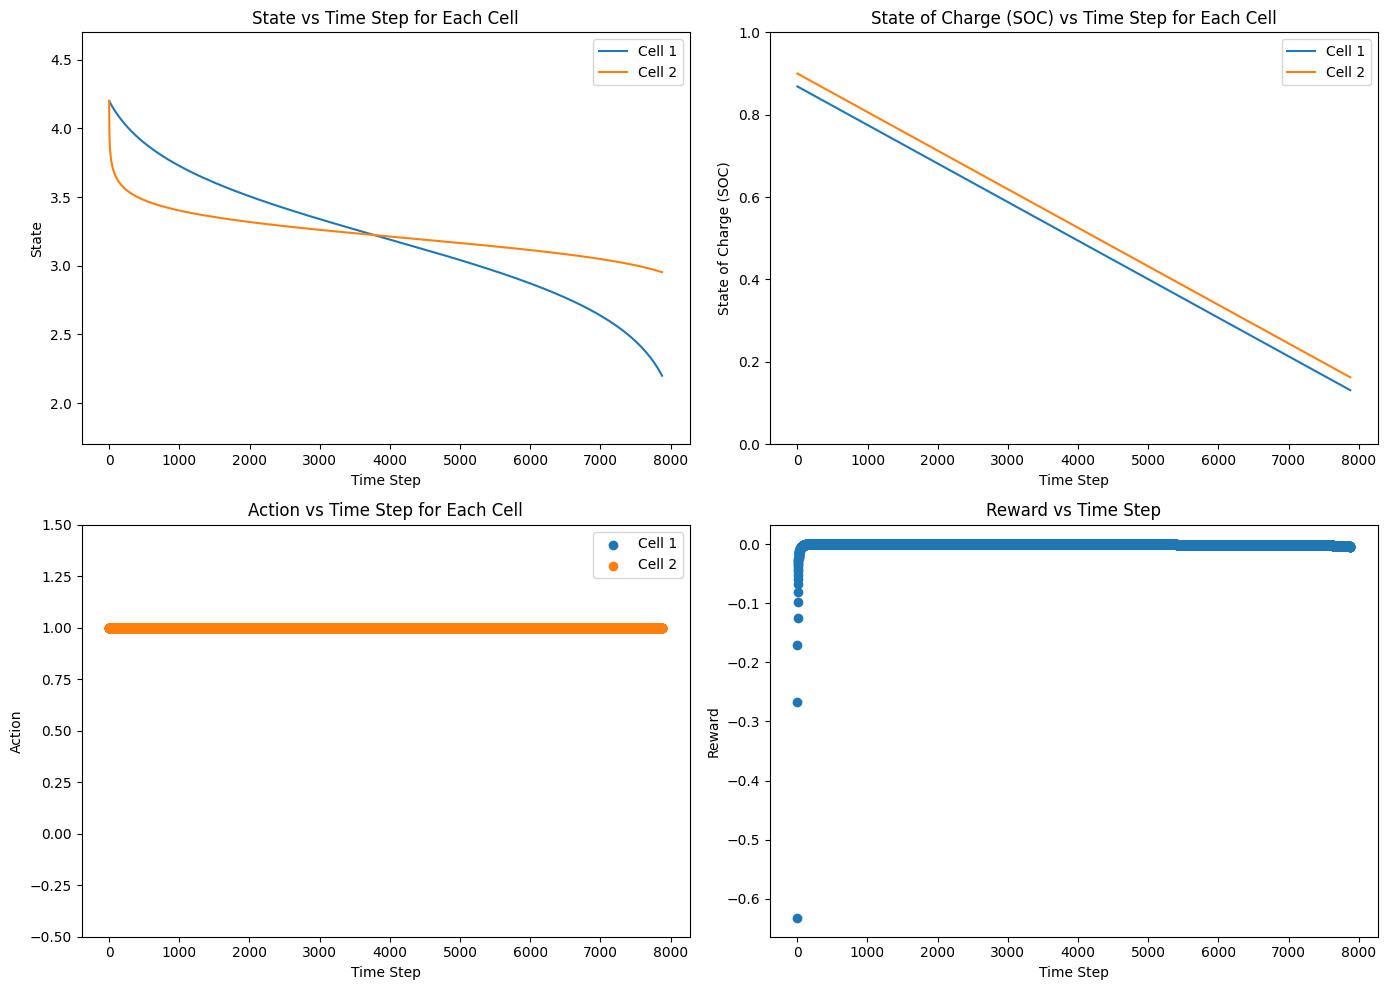

In [8]:
plot_bms_evolution(bms, states, states_soc, actions, rewards, dones)

# Cell 2 always discharging and Cell 1 always disconnected (still)

In [9]:
bms.reset()
states= [bms.state]
states_soc = [bms.state_soc]
actions = []
rewards = []
dones = [False]

while not dones[-1] and len(states) < T:
    action = 1
    state, reward, done, _ = bms.step(action)
    states.append(state)
    states_soc.append(bms.state_soc)
    actions.append(bms.int_action_to_switch_action(action))
    rewards.append(reward)
    dones.append(done)

print(f"Sum of rewards: {np.sum(rewards)}")

Sum of rewards: -10.881339966395686


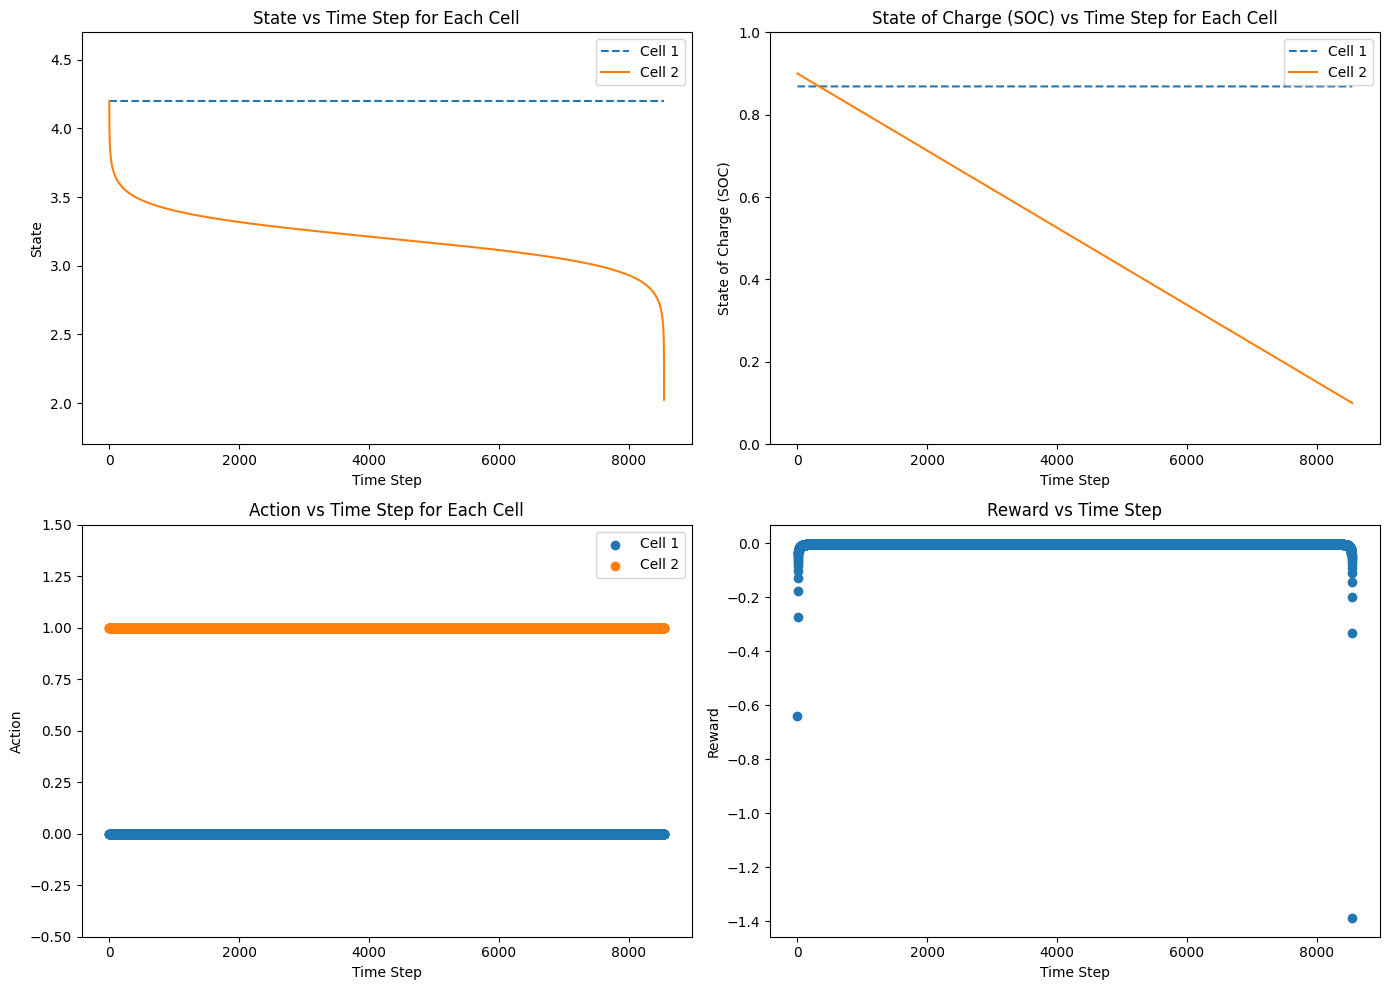

In [10]:
plot_bms_evolution(bms, states, states_soc, actions, rewards, dones)

# Cell 1 always discharging and Cell 2 always disconnected (still)

In [11]:
bms.reset()
states= [bms.state]
states_soc = [bms.state_soc]
actions = []
rewards = []
dones = [False]

while not dones[-1] and len(states) < T:
    action = 2
    state, reward, done, _ = bms.step(action)
    states.append(state)
    states_soc.append(bms.state_soc)
    actions.append(bms.int_action_to_switch_action(action))
    rewards.append(reward)
    dones.append(done)

print(f"Sum of rewards: {np.sum(rewards)}")

Sum of rewards: -10.004492039805868


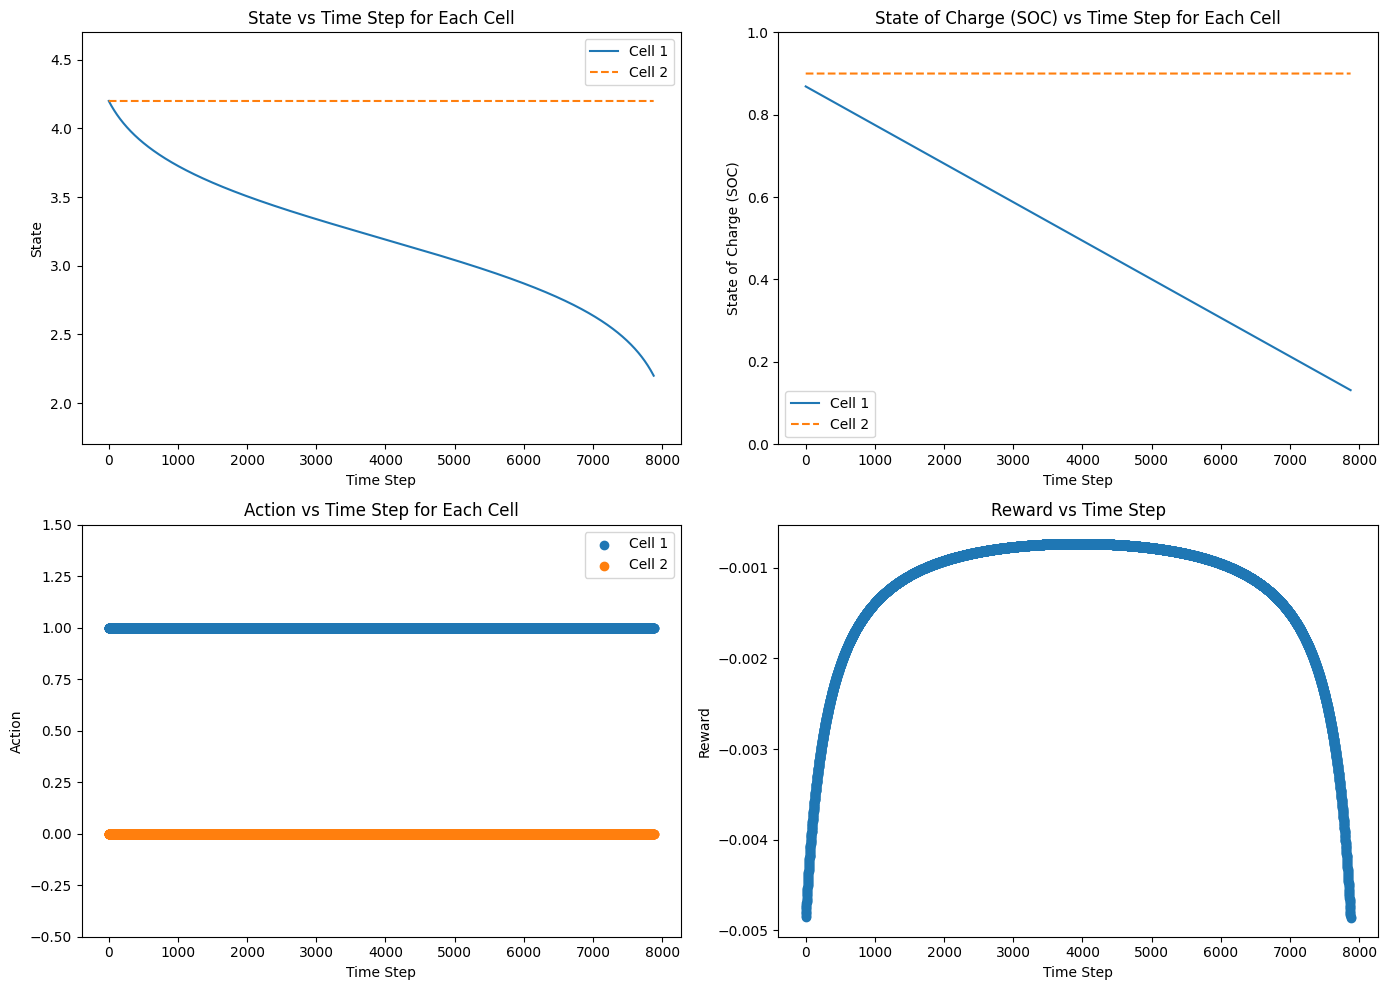

In [12]:
plot_bms_evolution(bms, states, states_soc, actions, rewards, dones)

# Random Controller

In [24]:
bms.reset()
states= [bms.state]
states_soc = [bms.state_soc]
actions = []
rewards = []
dones = [False]

while not dones[-1] and len(states) < T:
    action = bms.action_space.sample()
    while action ==0:
        action = bms.action_space.sample()
    state, reward, done, _ = bms.step(action)
    states.append(state)
    states_soc.append(bms.state_soc)
    actions.append(bms.int_action_to_switch_action(action))
    rewards.append(reward)
    dones.append(done)

print(f"Sum of rewards: {np.sum(rewards)}")

Sum of rewards: -1.7086502193879127


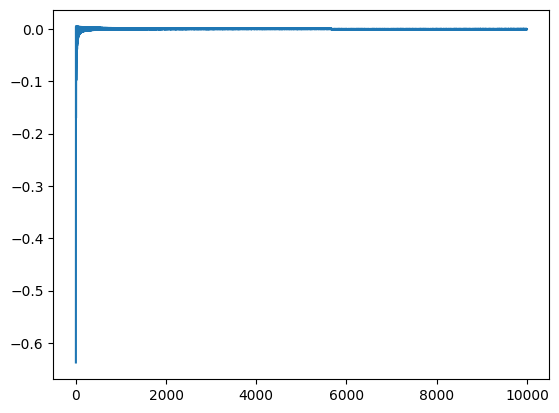

In [25]:
plt.plot(rewards)

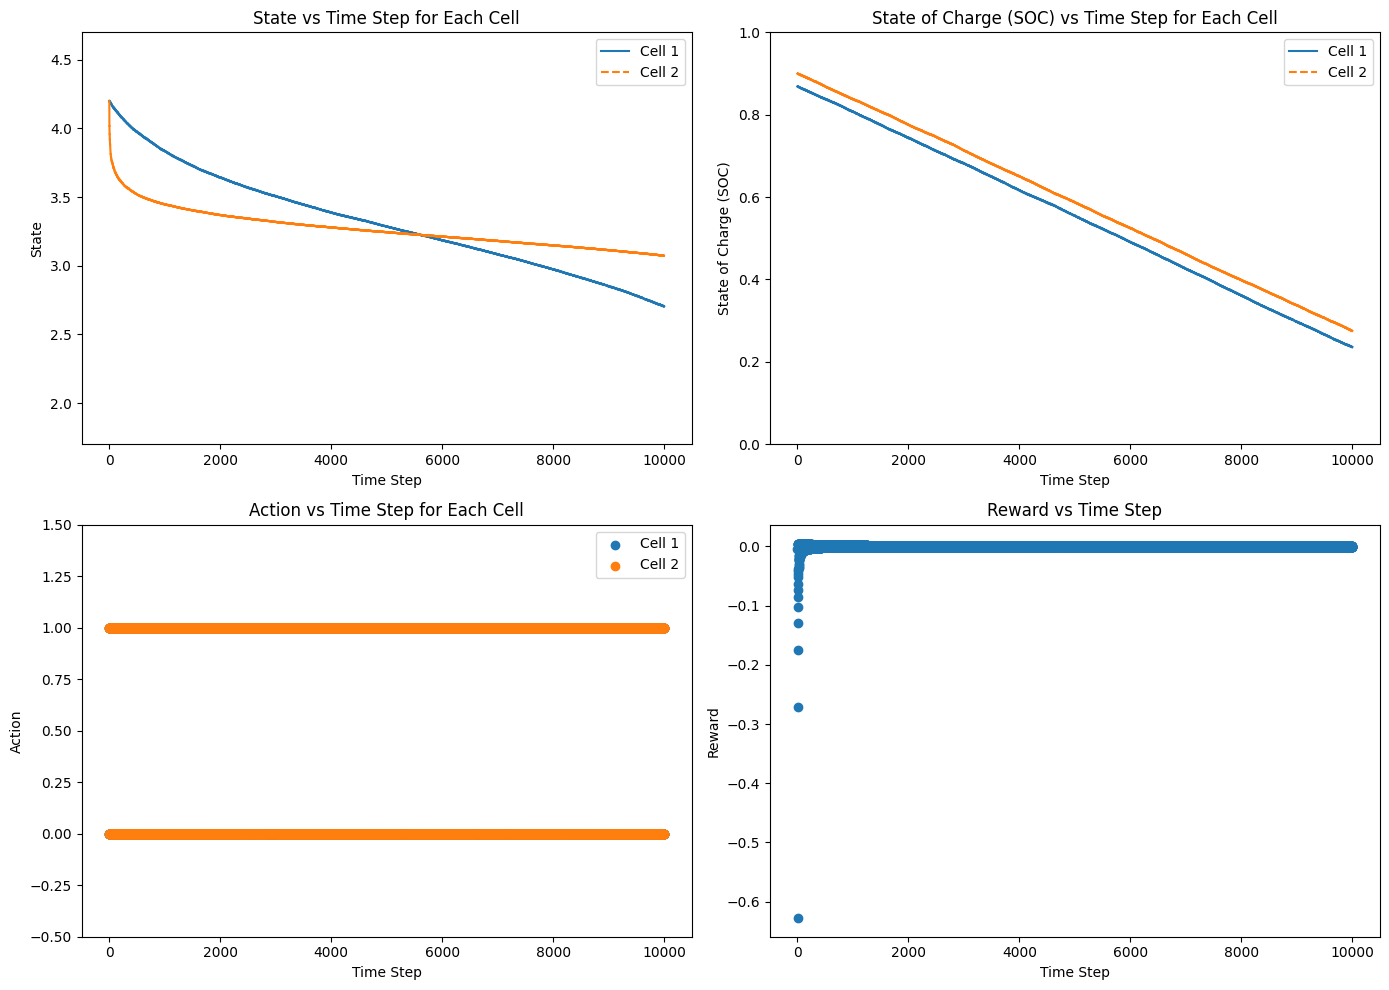

In [14]:
plot_bms_evolution(bms, states, states_soc, actions, rewards, dones)

In [15]:
bins = np.array([2.2, 2.6, 3, 3.15, 3.30 , 3.40, 3.50 ,4.2])



In [16]:
bins

array([2.2 , 2.6 , 3.  , 3.15, 3.3 , 3.4 , 3.5 , 4.2 ])

In [17]:
print(bms.int_action_to_switch_action(0))
print(bms.int_action_to_switch_action(1))
print(bms.int_action_to_switch_action(2))
print(bms.int_action_to_switch_action(3))

[0 0]
[0 1]
[1 0]
[1 1]


In [18]:
state_count, action_count = (len(bins) - 1)**bms.num_cells, 2**bms.num_cells
state_count, action_count
Q = np.zeros((state_count, action_count))
Q[:, 0] = -100

bms.reset()
states= [bms.state]
states_soc = [bms.state_soc]
actions = []
rewards = []
dones = [False]
random_actions = []
states_int = [features_to_unique_integer(states[-1], bins)]

epsilon = 0.2
stepsize = 0.5
gamma = 0.9

while not dones[-1] and len(states) < 2*T:

    state_int  = features_to_unique_integer(states[-1], bins)

    if np.random.uniform(0, 1) < epsilon:
        random_actions.append(True)
        action = bms.action_space.sample()
        while action == 0:
            action = bms.action_space.sample()
    else:
        random_actions.append(False)
        action = np.argmax(Q[state_int, :])

    state, reward, done, _ = bms.step(action)
    states.append(state)
    states_soc.append(bms.state_soc)
    actions.append(bms.int_action_to_switch_action(action))
    rewards.append(reward)
    dones.append(done)


    if not done:
        next_state_int = features_to_unique_integer(state, bins)
        states_int.append(next_state_int)
        Q[state_int, action] = Q[state_int, action] + stepsize * (reward + gamma * np.max(Q[next_state_int, :]) - Q[state_int, action])


print(f"Sum of rewards: {np.sum(rewards)}")

Sum of rewards: -2.794542098855617


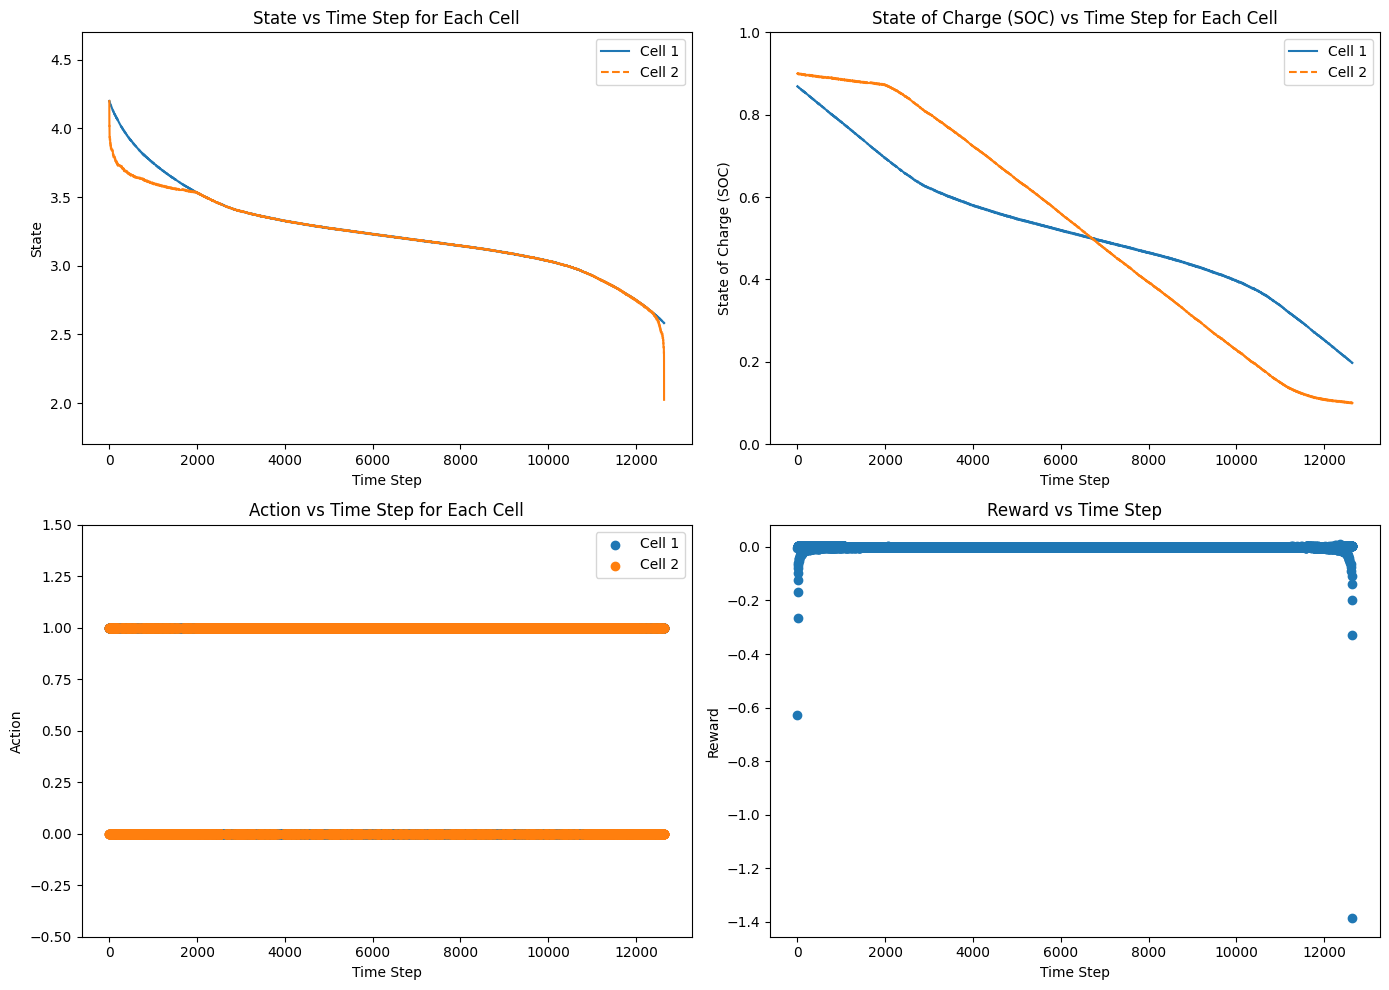

In [19]:
plot_bms_evolution(bms, states, states_soc, actions, rewards, dones)

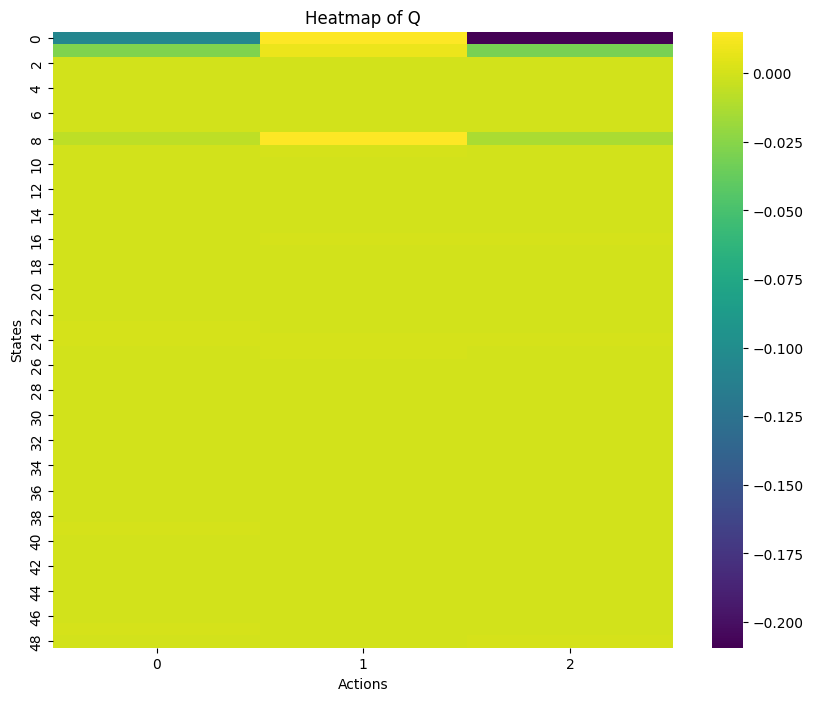

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(Q[:, 1:], cmap="viridis")
plt.title("Heatmap of Q")
plt.xlabel("Actions")
plt.ylabel("States")
plt.show()


In [21]:
bins

array([2.2 , 2.6 , 3.  , 3.15, 3.3 , 3.4 , 3.5 , 4.2 ])

In [22]:
np.bincount(np.array(states_int))


array([  53,   90,    0,    0,    0,    0,    0,    0, 2074,    3,    0,
          0,    0,    0,    0,    0, 2533,    0,    0,    0,    0,    0,
          0,    4, 3398,    3,    0,    0,    0,    0,    0,    0, 1519,
          0,    0,    0,    0,    0,    0,    6,  762,    0,    0,    0,
          0,    0,    0,    1, 2194])

In [23]:
Q[-1]

array([-1.00000000e+02, -8.43273342e-05, -3.10240966e-04,  7.13484493e-04])